In [1]:
from bs4 import BeautifulSoup, Comment
from fake_useragent import UserAgent
from random import randint
import requests, re
from time import sleep
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, log_loss, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize, wordpunct_tokenize, WhitespaceTokenizer, RegexpTokenizer
from nltk.util import ngrams

In [ ]:
files = []
lets = 'a'
letters = 'abcde'

for i in lets:
    for j in letters:
        files.append('x'+i+j)

#files.remove('xkz')
files
print (len(files))

In [ ]:
f = open('movie_reviews/reallyshortreviews.csv','w')

for next_file in files:
    file = open('movie_reviews/'+next_file,'rb')
    
    productid = ''
    userid = ''
    profilename = ''
    helpfulness = ''
    score = ''
    time = ''
    summary = ''
    review = ''

    for line in file:
    
        if review:
            row = productid[2:-1] + '\t' + userid[2:-1] + '\t' + profileName[2:-1] + '\t' + helpfulness[2:-1] + '\t' + score[2:-1] + '\t' + time[2:-1] + '\t' + summary[2:-1] + '\t' + review[2:-1] + '\n'
            f.write(row) 
            review = ''
    
        elif 'b\'product/productId:' in str(line):
            productid = str(line[19:-1])
    
        elif 'b\'review/userId:' in str(line):
            userid = str(line[15:-1])
    
        elif 'b\'review/profileName:' in str(line):
            profileName = str(line[20:-1])
    
        elif 'b\'review/helpfulness:' in str(line):
            helpfulness = str(line[20:-1])
    
        elif 'b\'review/score:' in str(line):
            score = str(line[14:-1])
    
        elif 'b\'review/time:' in str(line):
            time = str(line[13:-1])
    
        elif 'b\'review/summary:' in str(line):
            summary = str(line[16:-1])
    
        elif 'b\'review/text:' in str(line):
            review = str(line[13:-1])
    
        elif 'b\'\n' in str(line):
            continue
            
    file.close()

f.close()

In [2]:
columns = ['productId', 'userid', 'profilename', 'helpfulness', 'score', 'time', 'summary', 'review']

shortened_movie_reviews = pd.read_csv('movie_reviews/reallyshortreviews.csv', delimiter='\t', names=columns)
shortened_movie_reviews

,productId,userid,profilename,helpfulness,score,time,summary,review
0,B003AI2VGA,A141HP4LYPWMSR,"Brian E. Erland ""Rainbow Sphinx""",7/7,3.0,1.182730e+09,There Is So Much Darkness Now ~ Come For The M...,"Synopsis: On the daily trek from Juarez, Mexic..."
1,B003AI2VGA,A1M5405JH9THP9,golgotha.gov,1/1,3.0,1.197158e+09,distantly based on a real tragedy,THE VIRGIN OF JUAREZ (2006)<br />directed by K...
2,B003AI2VGA,AQJVNDW6YZFQS,Charles R. Williams,3/11,1.0,1.164154e+09,"This is junk, stay away","Mexican men are macho rapists, gangsters or in..."
3,B00006HAXW,A3Q4S5DFVPB70D,Joseph P. Aiello,26/26,5.0,1.041293e+09,A Rock N Roll History Lesson,I recvd this video (DVD version) as a Christma...
4,B00006HAXW,A1FRPGQYQTAOR1,Les,9/9,5.0,1.062979e+09,"Marvelous, just Marvelous!",The people who have reviewed this DVD before m...
5,B00006HAXW,AFKMBAY28XO8A,RFP,7/7,5.0,1.038787e+09,ROCK RYTHM AND DOOWOP,"Excellent, excellent performers. Excellent vi..."
6,B00006HAXW,AFJ27ZV9183B8,Michael A. Martin,3/3,5.0,1.200096e+09,Another outstanding performance and concert.,As I stated in my reviews for Doo Wop 50 and D...
7,B00004CQT3,A1CIW2OEVAJRM2,Godly Gadfly,14/15,5.0,1.092442e+09,Spectacular and suspenseful family film!,"The cover of our DVD of ""Far From Home"" says i..."
8,B00004CQT3,A2IMLPUXYQJTSY,"Jerry Loveless ""jerryl3515""",7/7,5.0,1.146960e+09,Excellent Family Movie,"As owners of a Yellow Lab, we just might be a ..."
9,B00004CQT3,A3RVH9HUN9J4LZ,Michael,1/1,5.0,1.248826e+09,A movie for all ages,You don\'t have to be a kid to enjoy this film...


In [ ]:
for i in range(0,100):
    print ((type(shortened_movie_reviews.iloc[i,4])))

In [ ]:
productids = list(shortened_movie_reviews['productId'].unique())
print (len(productids))

reviewers = list(shortened_movie_reviews['userid'].unique())
print (len(reviewers))

In [ ]:
# shortened_movie_reviews['movieTitle'] = ''
# shortened_movie_reviews['genres'] = ''

In [ ]:
# us = UserAgent()
# user_agent = {'User-Agent':us.random}

# def movie_titles(pid):
#     if type(pid) == str:
#         url = 'https://www.amazon.com/dp/'+pid+'/'
#         sleep(1)
#         response = requests.get(url, headers=user_agent)
#         page = response.text
#         print (url)
#         return page

# #movies = []
# shortened_movies = {}
# i = 0

# for pid in productids:
#     if type(pid) == str:
#         movie_soup = BeautifulSoup(movie_titles(pid), 'lxml')
#         shortened_movies[pid] = movie_soup
#         print (i)
#         i+=1
# #    movies.append(movie_soup)

# print (len(shortened_movies))

In [ ]:
# less_titles = {}
# less_genres = {}
# i = 0

# for pid, movie in shortened_movies.items():
    
#     if movie.find('h1',{'id':'aiv-content-title'}):
#         t = movie.find('h1',{'id':'aiv-content-title'}).text
#         title = t.split('\n')
#     elif movie.find('span',{'id':'productTitle'}):
#         t = movie.find('span',{'id':'productTitle'}).text
#         title = t.split('\n')
        
#     less_titles[pid] = title
    
#     if movie.find('table',{'class':'a-keyvalue a-horizontal-stripes a-align-top product-details-meta'}):
#         movie_table = movie.find('table',{'class':'a-keyvalue a-horizontal-stripes a-align-top product-details-meta'})
#         g = movie_table.find('tr').find('td').find_all('a')
#         gen = [i.text for i in g]
#     else:
#         gen = 'Other'
        
#     less_genres[pid] = gen
    
#     print (title)
#     print (i)
#     i+=1
    
# print (titles)
# print (genres)

In [ ]:
# shortened_movie_titles = {}
# for pid, title in less_titles.items():
#     x = ' '.join(title).split()
#     shortened_movie_titles[pid] = (' '.join(x))    

# shortened_movie_titles

In [ ]:
# for i in range(0,len(shortened_movie_reviews)):
#     for pid, title in shortened_movie_titles.items():
#         if pid == shortened_movie_reviews.iloc[i,0]:
#             shortened_movie_reviews.iloc[i,8] = title

In [ ]:
# for i in range(0,len(moviereviews)):
#     for pid, gen in less_genres.items():
#         if pid == moviereviews.iloc[i,0]:
#             moviereviews.iloc[i,9] = gen

In [3]:
from sklearn.utils import shuffle
shortened_movie_reviews = shuffle(shortened_movie_reviews,random_state=42)
shortened_movie_reviews = shortened_movie_reviews.reset_index(drop=True)

In [ ]:
shortened_movie_reviews.head()

In [ ]:
shortened_movie_reviews['movie_url'] = ''

In [ ]:
for i in range(0,len(shortened_movie_reviews)):
    if type(shortened_movie_reviews.iloc[i,0]) == str:
        shortened_movie_reviews.iloc[i,8] = 'https://www.amazon.com/dp/'+shortened_movie_reviews.iloc[i,0]+'/'
    else:
        shortened_movie_reviews.iloc[i,8] = 'None'

In [4]:
shortened_movie_reviews.score = shortened_movie_reviews.score.fillna(5.0)

In [5]:
for i in range(0,len(shortened_movie_reviews)):
    if type(shortened_movie_reviews.iloc[i,7]) != str:
        print (i)
        shortened_movie_reviews.iloc[i,7] = shortened_movie_reviews.iloc[i,6]

12537
17415
19227
23811
24783
36825
45506
50615
51424
54968
60464
65722
70318


In [ ]:
shortened_movie_reviews.head(10)

In [ ]:
import pickle

In [ ]:
# Number of reviewers' scores for that particular movie

count_ratings = Counter(shortened_movie_reviews['score'])
baseline = pd.DataFrame.from_dict(count_ratings, orient='index')
baseline_clean = baseline.T

baseline.plot(kind='bar')
baseline_clean

In [6]:
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import Normalizer

In [7]:
smr_train = shortened_movie_reviews.iloc[:55000,:]
smr_test = shortened_movie_reviews.iloc[55000:,:].reset_index(drop=True)

In [13]:
vectorizer = CountVectorizer(min_df = 10, max_df=500, stop_words = 'english')
#vectorizer2 = TfidfVectorizer(min_df = 20)
count_mat = vectorizer.fit_transform(smr_train.review) 
#count_mat2 = vectorizer2.fit_transform(df_train.review)


In [ ]:
#pickle.dump(count_mat, 'matrix.pkl', 'w')

In [ ]:
pd.DataFrame(count_mat.toarray(), columns=vectorizer.get_feature_names()).head(10)

In [14]:
lsa = TruncatedSVD(100, algorithm='arpack')
reduced_mat = lsa.fit_transform(count_mat)

In [15]:
reduced_mat = Normalizer(copy=False).fit_transform(reduced_mat)

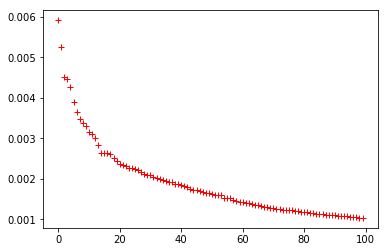

In [16]:
plt.plot(lsa.explained_variance_ratio_,'r+')

In [17]:
sum(lsa.explained_variance_ratio_)

0.19230291789672668

In [ ]:
terms = np.array(vectorizer.get_feature_names())

In [ ]:
def get_topical_terms(topic_mat, topic_num, term_vec, num_terms=25):
    return term_vec[np.argsort(-topic_mat[topic_num,:])][:num_terms]

In [ ]:
for i in range(10,20):
    print("topic {}".format(i))
    print(get_topical_terms(lsa.components_,i,terms, 20))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import precision_recall_curve, accuracy_score

In [ ]:
rf1 = RandomForestClassifier(n_estimators=500, max_features='sqrt')
rf1.fit(reduced_mat[:,:20],smr_train.score)